In [19]:
import numpy as np
import pandas as pd
from tabulate import tabulate

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def parametric_relu(x, alpha):
    return np.maximum(alpha * x, x)

def exponential_relu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    exp_x = np.exp(x - np.max(x)) # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)

# Input values
x_values = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
df = pd.DataFrame({
    "x": x_values,
    "Leaky ReLU": leaky_relu(x_values),
    "Parametric ReLU (α=0.01)": parametric_relu(x_values, alpha=0.01),
    "ELU": exponential_relu(x_values),
})

# Softmax
x_softmax = np.array([1.0, 2.0, 3.0, 4.0])
softmax_values = softmax(x_softmax)
softmax_df = pd.DataFrame({
    "x": x_softmax,
    "Softmax": softmax_values
})

# Pretty print with tabulate
print("\n=== Activation Function Outputs ===")
print(tabulate(df, headers="keys", tablefmt="fancy_grid"))

print("\n=== Softmax Outputs ===")
print(tabulate(softmax_df, headers="keys", tablefmt="fancy_grid"))



=== Activation Function Outputs ===
╒════╤═════╤══════════════╤════════════════════════════╤═══════════╕
│    │   x │   Leaky ReLU │   Parametric ReLU (α=0.01) │       ELU │
╞════╪═════╪══════════════╪════════════════════════════╪═══════════╡
│  0 │  -5 │        -0.05 │                      -0.05 │ -0.993262 │
├────┼─────┼──────────────┼────────────────────────────┼───────────┤
│  1 │  -4 │        -0.04 │                      -0.04 │ -0.981684 │
├────┼─────┼──────────────┼────────────────────────────┼───────────┤
│  2 │  -3 │        -0.03 │                      -0.03 │ -0.950213 │
├────┼─────┼──────────────┼────────────────────────────┼───────────┤
│  3 │  -2 │        -0.02 │                      -0.02 │ -0.864665 │
├────┼─────┼──────────────┼────────────────────────────┼───────────┤
│  4 │  -1 │        -0.01 │                      -0.01 │ -0.632121 │
├────┼─────┼──────────────┼────────────────────────────┼───────────┤
│  5 │   0 │         0    │                       0    │  0       

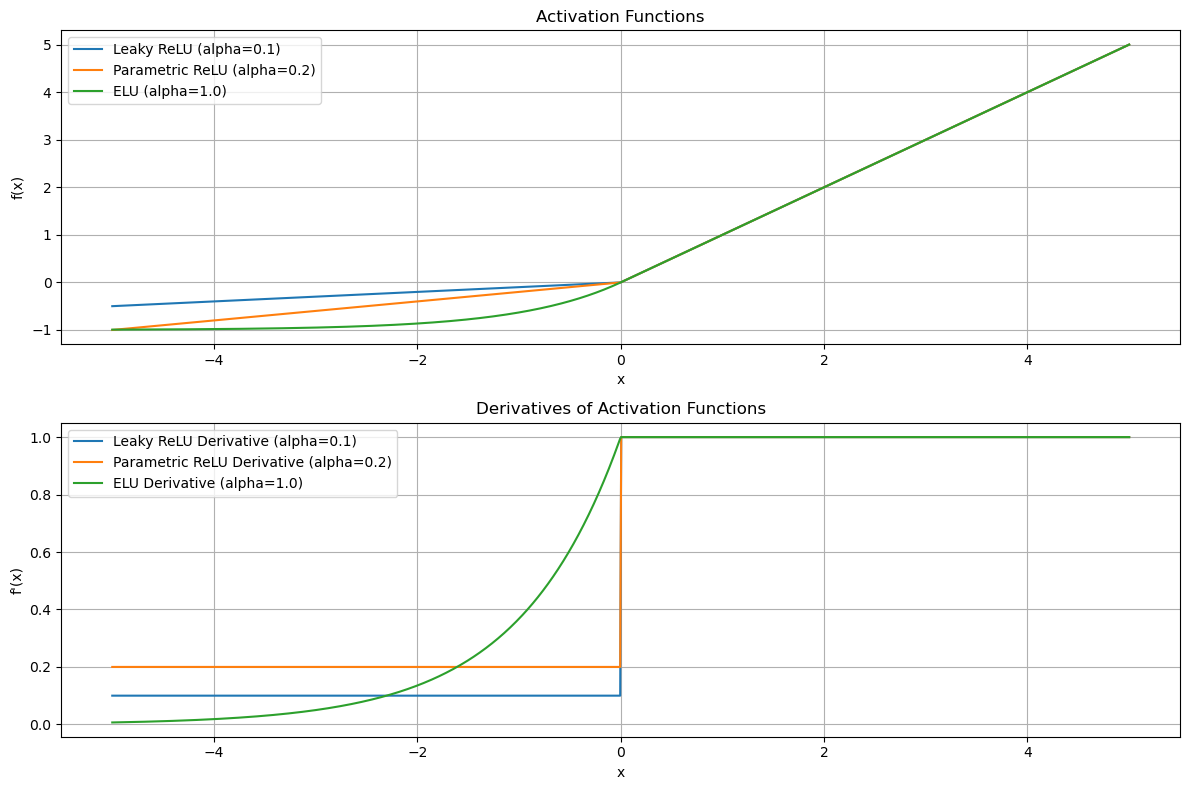

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

alpha_leaky = 0.1
leaky_relu_val = np.maximum(alpha_leaky * x, x)
leaky_relu_derivative = np.where(x > 0, 1, alpha_leaky)

alpha_parametric = 0.2
parametric_relu_val = np.maximum(alpha_parametric * x, x)
parametric_relu_derivative = np.where(x > 0, 1, alpha_parametric)

alpha_elu = 1.0
elu_val = np.where(x > 0, x, alpha_elu * (np.exp(x) - 1))
elu_derivative = np.where(x > 0, 1, alpha_elu * np.exp(x))
x_softmax_single = np.array([1.0])
softmax_val_single = np.exp(x_softmax_single) / np.sum(np.exp(x_softmax_single))
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x, leaky_relu_val, label=f'Leaky ReLU (alpha={alpha_leaky})')
plt.plot(x, parametric_relu_val, label=f'Parametric ReLU (alpha={alpha_parametric})')
plt.plot(x, elu_val, label=f'ELU (alpha={alpha_elu})')

plt.title("Activation Functions")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Plot derivatives
plt.subplot(2, 1, 2)
plt.plot(x, leaky_relu_derivative, label=f'Leaky ReLU Derivative (alpha={alpha_leaky})')
plt.plot(x, parametric_relu_derivative, label=f'Parametric ReLU Derivative (alpha={alpha_parametric})')
plt.plot(x, elu_derivative, label=f'ELU Derivative (alpha={alpha_elu})')
plt.title("Derivatives of Activation Functions")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()